In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [103]:
from sklearn import metrics

In [111]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

In [18]:
%matplotlib inline

In [63]:
#Importing the dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [64]:
#Looking at number of columns
df.shape

(5000, 14)

In [65]:
#Looking at columns and type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [66]:
#Checking for Null Values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [67]:
#Printing the first 5 rows
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [68]:
#Looking at stats summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [69]:
#Checking the number of unique values to find out possible categorical variables
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [72]:
def replace(a):
    if a < 0:
        return 20
    else:
        return a

In [78]:
df['Experience']=df['Experience'].apply(replace)

In [79]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [80]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [81]:
df['Experience'].value_counts()

20    200
32    154
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
27    125
34    125
17    125
29    124
22    124
7     121
15    119
6     119
8     119
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
31    104
12    102
38     88
39     85
2      85
1      74
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

In [82]:
df = df.drop(columns=['ZIP Code'])

In [83]:
df = df.drop(columns=['ID'])

In [84]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


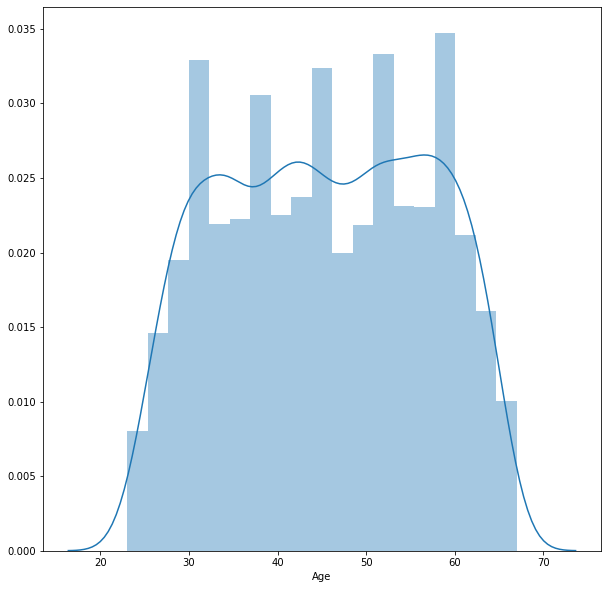

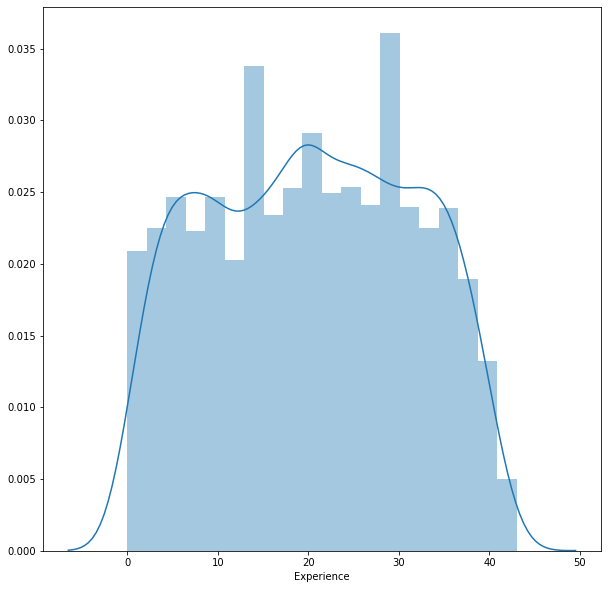

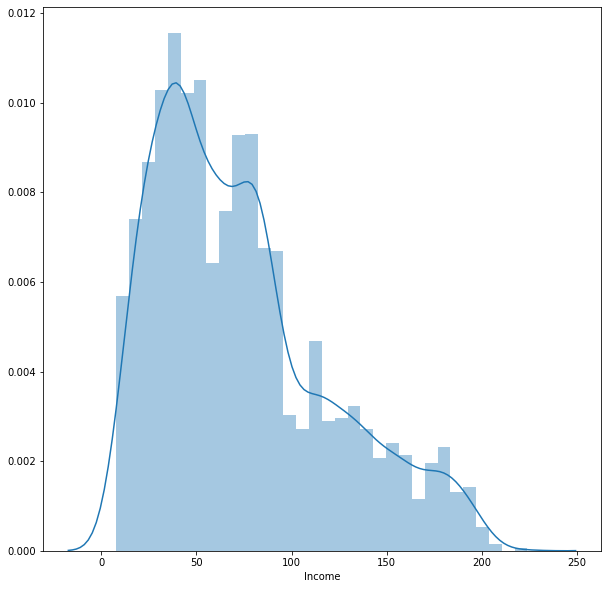

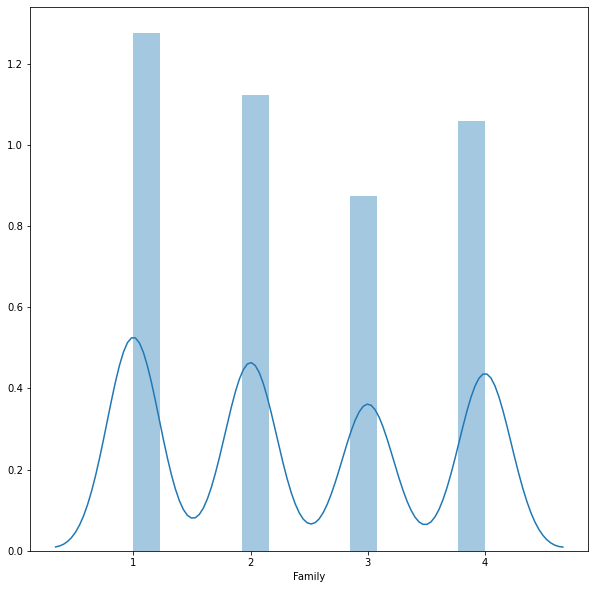

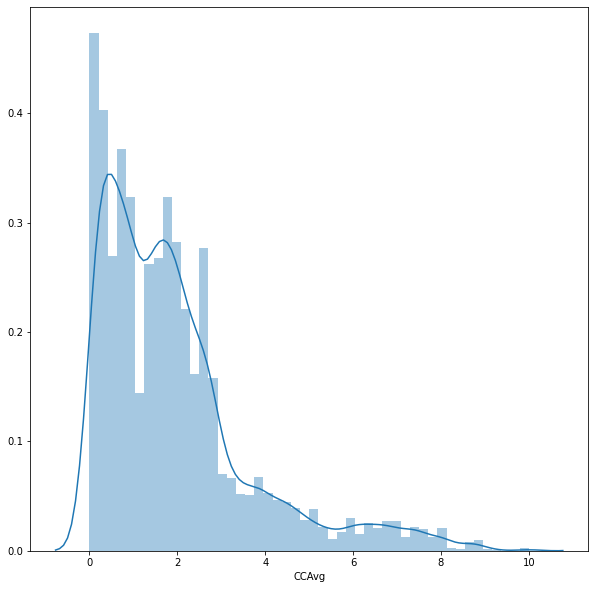

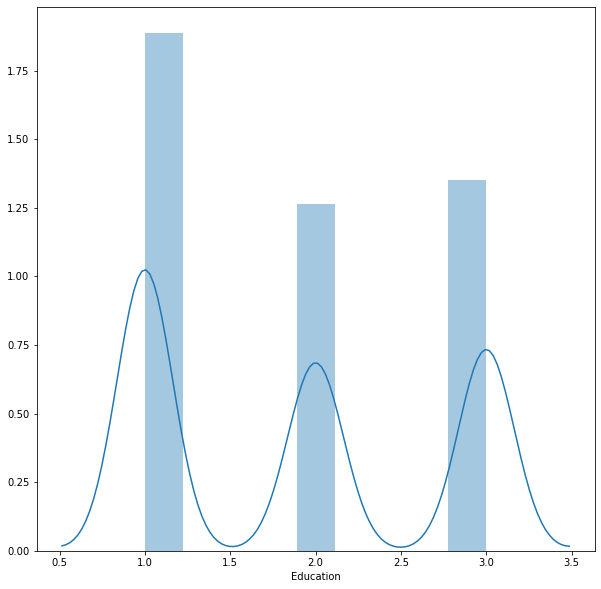

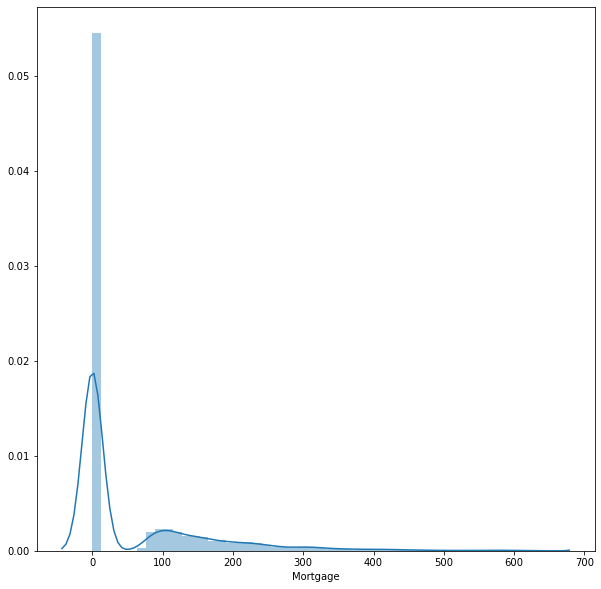

/Users/dpka/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


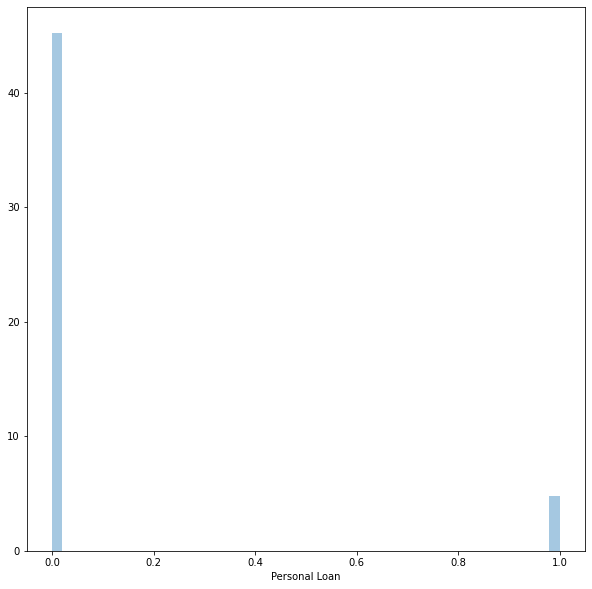

/Users/dpka/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


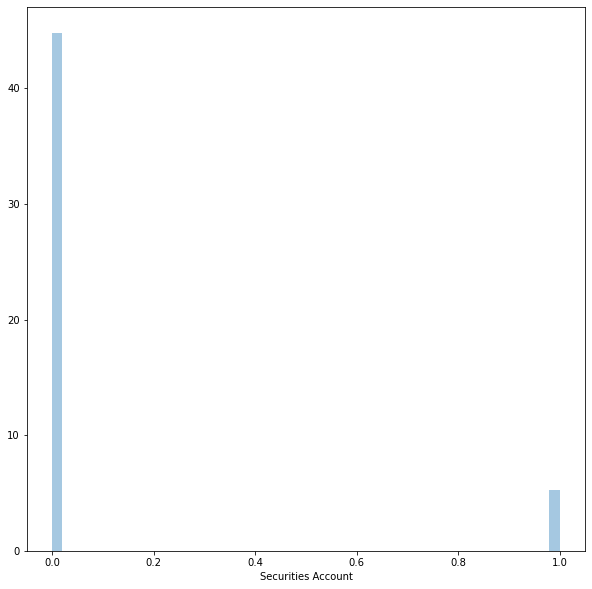

/Users/dpka/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


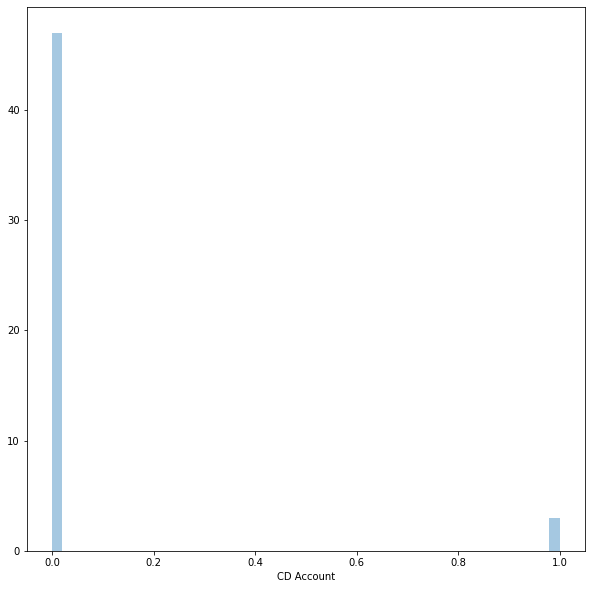

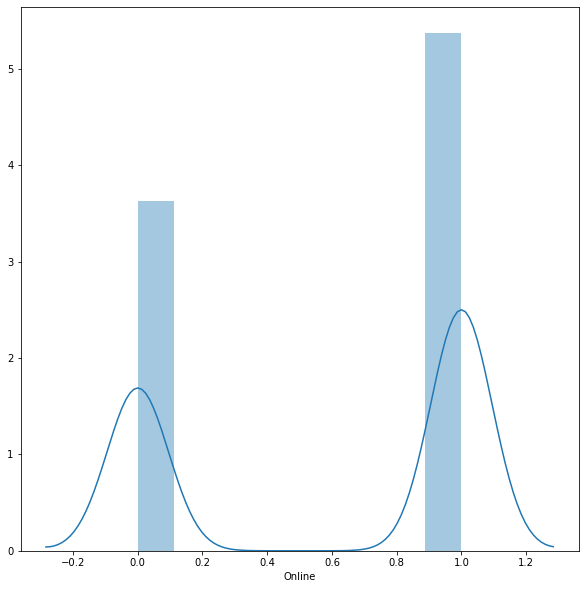

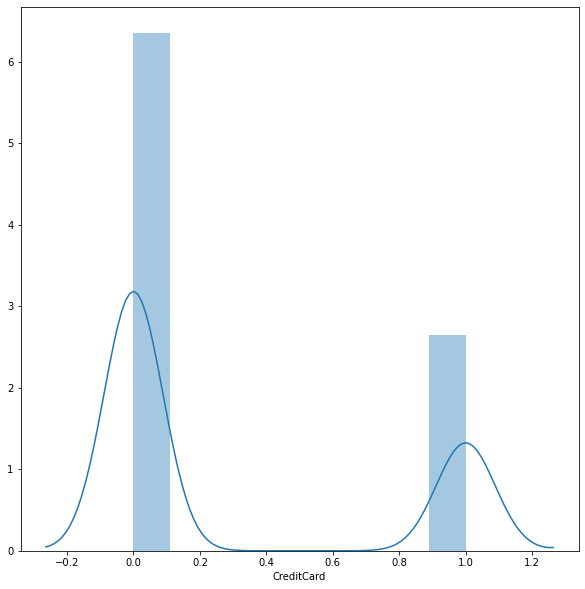

In [85]:
#Looking at the distribution of all the variables
for item in df.columns:
    plt.figure(figsize = (10,10))
    sns.distplot(df[item])
    plt.show()

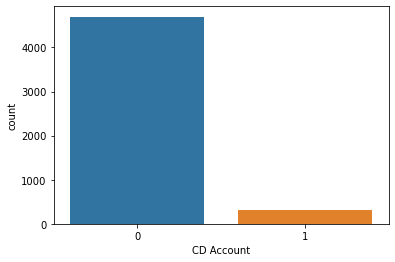

In [165]:
sns.countplot(df['CD Account'])

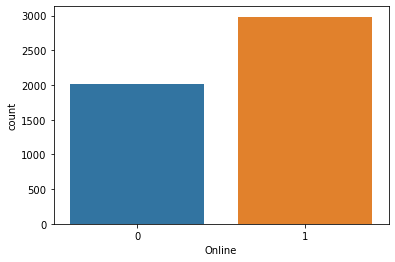

In [166]:
sns.countplot(df['Online'])

In [ ]:
#Insights from Univariate Analysis:
# Age is uniformly distributed with multi peaks
# Experience is uniformly distributed
# Income is positively Skewed
# Avg credit card spending per month is positively skewed
# The count of CD account and Onine is large and so there is a huge crowd to target for the marketting


In [86]:
#Number of people with zero mortage
df['Mortgage'].value_counts()
#There are 3462 people with zero mortages

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [87]:
#Number of people with zero credit card spending per month?
df['CCAvg'].value_counts().to_dict()
#106 people are with zero cc spending per month

{0.3: 241,
 1.0: 231,
 0.2: 204,
 2.0: 188,
 0.8: 187,
 0.1: 183,
 0.4: 179,
 1.5: 178,
 0.7: 169,
 0.5: 163,
 1.7: 158,
 1.8: 152,
 1.4: 136,
 2.2: 130,
 1.3: 128,
 0.6: 118,
 2.8: 110,
 2.5: 107,
 0.9: 106,
 0.0: 106,
 1.9: 106,
 1.6: 101,
 2.1: 100,
 2.4: 92,
 2.6: 87,
 1.1: 84,
 1.2: 66,
 2.7: 58,
 2.3: 58,
 2.9: 54,
 3.0: 53,
 3.3: 45,
 3.8: 43,
 3.4: 39,
 2.67: 36,
 4.0: 33,
 4.5: 29,
 3.9: 27,
 3.6: 27,
 4.3: 26,
 6.0: 26,
 3.7: 25,
 4.7: 24,
 3.2: 22,
 4.1: 22,
 4.9: 22,
 3.1: 20,
 6.5: 18,
 5.0: 18,
 5.4: 18,
 0.67: 18,
 2.33: 18,
 1.67: 18,
 4.4: 17,
 5.2: 16,
 3.5: 15,
 6.9: 14,
 7.0: 14,
 6.1: 14,
 4.6: 14,
 7.2: 13,
 5.7: 13,
 7.4: 13,
 6.3: 13,
 7.5: 12,
 8.0: 12,
 4.2: 11,
 6.33: 10,
 6.8: 10,
 8.1: 10,
 7.3: 10,
 0.75: 9,
 1.75: 9,
 6.67: 9,
 4.33: 9,
 7.6: 9,
 6.7: 9,
 1.33: 9,
 8.8: 9,
 7.8: 9,
 8.6: 8,
 4.8: 7,
 5.6: 7,
 5.1: 6,
 5.9: 5,
 7.9: 4,
 5.3: 4,
 6.6: 4,
 5.5: 4,
 5.8: 3,
 10.0: 3,
 6.4: 3,
 4.75: 2,
 8.5: 2,
 4.25: 2,
 8.3: 2,
 5.67: 2,
 6.2: 2,
 9.0: 2,
 

In [88]:
df_cat = df[['Education','Personal Loan','Securities Account','Securities Account','CD Account','Online','CreditCard']]
df_cat.head()

,Education,Personal Loan,Securities Account,Securities Account,CD Account,Online,CreditCard
0,1,0,1,1,0,0,0
1,1,0,1,1,0,0,0
2,1,0,0,0,0,0,0
3,2,0,0,0,0,0,0
4,2,0,0,0,0,0,1


In [89]:
#Value count for all the categorical columns
df_cat.apply(pd.Series.value_counts)

,Education,Personal Loan,Securities Account,Securities Account,CD Account,Online,CreditCard
0,NaN,4520.0,4478.0,4478.0,4698.0,2016.0,3530.0
1,2096.0,480.0,522.0,522.0,302.0,2984.0,1470.0
2,1403.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1501.0,NaN,NaN,NaN,NaN,NaN,NaN


/Users/dpka/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/dpka/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/dpka/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


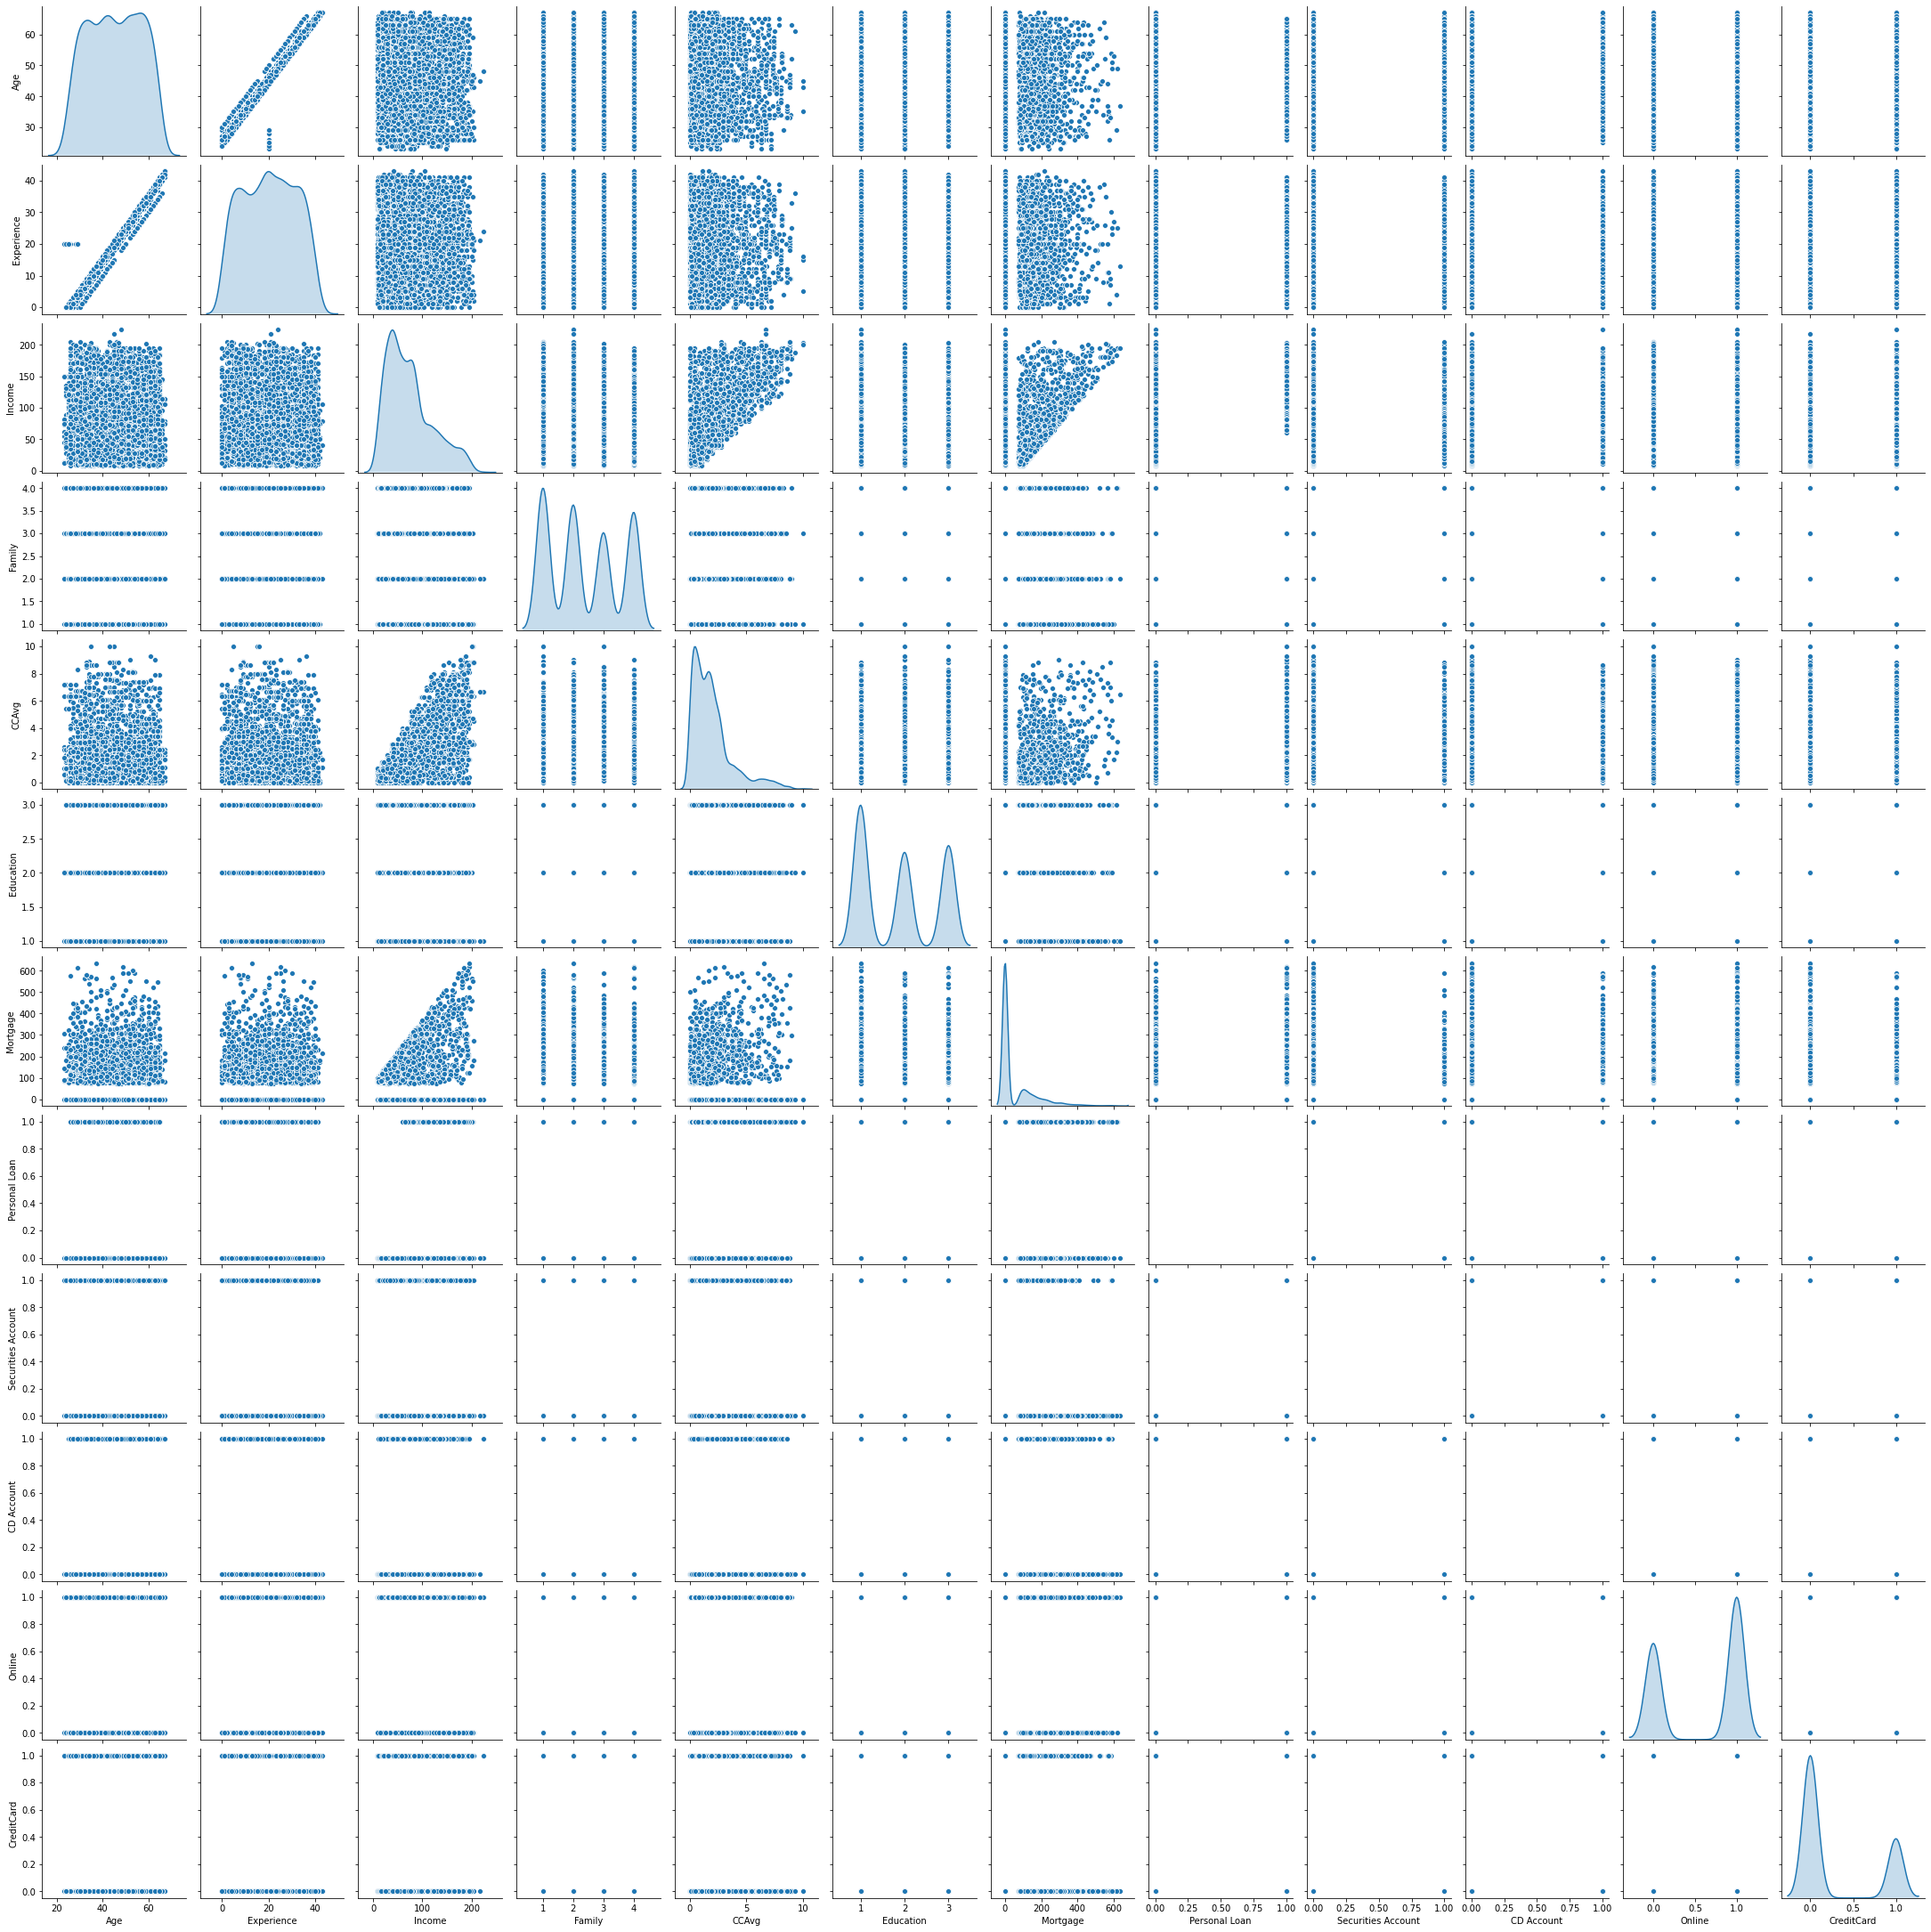

In [90]:
#Bivariate analysis
sns.pairplot(data = df, diag_kind = 'kde')

In [115]:
df.groupby('Personal Loan').mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.367257,20.378982,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [ ]:
#Exprience and age are highly linearly related (+ve)
#Credit card spending per month are income are linearly related (+ve)
#Surprisingly Experience and age are not linearly related
#People with high income got the personal loan

In [91]:
#Creating the dependent variable
y = df['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [92]:
#Creating the independent variable
x = df.drop(columns = 'Personal Loan')
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [94]:
#Splitting the data 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [96]:
x_train.shape

(3500, 11)

In [97]:
#Fitting the model
model = LogisticRegression()
model.fit(x_train, y_train)

/Users/dpka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
#Predicting the values using logistic regression
y_predict = model.predict(x_test)

In [1]:
y_predict.shape

NameError: name 'y_predict' is not defined

In [101]:
#Accuracy of the model
model_score = model.score(x_test, y_test)
print(model_score)

0.9366666666666666


In [163]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.938

Testing accuracy 0.9366666666666666

Confusion Matrix


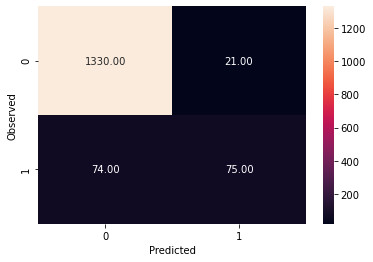

None

Recall: 0.5033557046979866

Precision: 0.78125

F1 Score: 0.6122448979591837

Roc Auc Score: 0.7439058316236047


In [164]:
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [160]:
confusion_matrix(y_test,y_predict)

array([[1330,   21],
       [  74,   75]])

In [114]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
8,CD Account,4.07
9,Online,1.39
10,CreditCard,1.17
5,Education,1.05
7,Securities Account,0.29
3,Family,0.28
0,Age,0.19
1,Experience,0.16
4,CCAvg,0.11
2,Income,0.04


In [136]:
df_new = pd.DataFrame({'Predicted Values': y_predict, 'y_Test': y_test})
df_new.head()

,Predicted Values,y_Test
2764,0,0
4767,0,0
3814,0,0
3499,0,0
2735,0,0


In [137]:
df_new = df_new.reset_index()

df_new.head()

,index,Predicted Values,y_Test
0,2764,0,0
1,4767,0,0
2,3814,0,0
3,3499,0,0
4,2735,0,0


In [138]:
df_new['Compare'] = np.where(df_new['Predicted Values'] == df_new['y_Test'], 
                                 'True', 'False')
df_new.head()

,index,Predicted Values,y_Test,Compare
0,2764,0,0,True
1,4767,0,0,True
2,3814,0,0,True
3,3499,0,0,True
4,2735,0,0,True


In [144]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1500 non-null   int64 
 1   Predicted Values  1500 non-null   int64 
 2   y_Test            1500 non-null   int64 
 3   Compare           1500 non-null   object
dtypes: int64(3), object(1)
memory usage: 47.0+ KB


In [159]:
#Printing the mismatches
counter = 0;
false_count = 0
for item in df_new['Compare']:
    if item == 'False':
        false_count = false_count +1
        print('The value of y_test is: '+ str(df_new.loc[counter, 'y_Test']) + ' The value of predicted is: ' + str(df_new.loc[counter, 'Predicted Values']))
    counter = counter +1
print('The total number of mismatches are: ' + str(false_count))

The value of y_test is: 0 The value of predicted is: 1
The value of y_test is: 1 The value of predicted is: 0
The value of y_test is: 1 The value of predicted is: 0
The value of y_test is: 1 The value of predicted is: 0
The value of y_test is: 1 The value of predicted is: 0
The value of y_test is: 1 The value of predicted is: 0
The value of y_test is: 0 The value of predicted is: 1
The value of y_test is: 0 The value of predicted is: 1
The value of y_test is: 1 The value of predicted is: 0
The value of y_test is: 0 The value of predicted is: 1
The value of y_test is: 0 The value of predicted is: 1
The value of y_test is: 1 The value of predicted is: 0
The value of y_test is: 0 The value of predicted is: 1
The value of y_test is: 1 The value of predicted is: 0
The value of y_test is: 1 The value of predicted is: 0
The value of y_test is: 1 The value of predicted is: 0
The value of y_test is: 1 The value of predicted is: 0
The value of y_test is: 0 The value of predicted is: 1
The value 

In [143]:
df_new['Compare'].value_counts()

True     1405
False      95
Name: Compare, dtype: int64

In [ ]:
#Conclusion:
#There is a huge crowd of customers to target for the marketing of personal loan (from the count plots)
#People with a CD are more likely to pick up the loan
# The second highest probability is people with online account
# People with credit card and higher education have almost equal probability of taking a personal loan 
